## 짤막 지식
- 구글에서 텐서플로 1 (2016)
  + 시장 점유율 차지 (연구소 & 상용기업)
  + 코드가 어려움 / 매우 김 / 기존 파이썬과 문법(NumPy) 이질감
- 페이스북에서 파이토치 (2017)
  + 시장 점유율 따라잡고 --> 압도 (특히 연구소)
  + 문법이 NumPy와 유사
- 구글에서 텐서플로 2 (2019)
  + 문법이 편해짐
  + 모델 배포 & 서비스에 집중

## 지금 현재
- 페이스북(메카), 파이토치를 리눅스 재단에 넘김. 
- 딥러닝 / 서비스가 되지 않으면 업계에서는 무의미하게 바라볼 가능성이 높음을 시사

## 텐서플로 2.x 기초 문법

### 임의 데이터셋 사용

In [3]:
import tensorflow as tf 
import numpy as np
print(tf.__version__)

2.9.2


In [4]:
x = np.random.sample((100, 3))
dataset = tf.data.Dataset.from_tensor_slices(x)

In [5]:
import tensorflow_datasets as tfds 
ds = tfds.load('mnist', split='train', shuffle_files = True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


- 케라스 예제

In [6]:
data_train, data_test = tf.keras.datasets.mnist.load_data()
(images_train, labels_train) = data_train # 훈련데이터셋 정의 
(images_test, labels_test) = data_test # 훈련데이터셋 정의 

11490434/11490434 [==============================] - 0s 0us/step


## 모델 정의
- (1) Sequential API (입문)
- (2) Functional API (초급)
- (3) Model Subclassing API (궁극적으로 지향)

## 모델 개발 순서 
- 모델 컴파일
- 모델 훈련
- 모델 평가
- 훈련 과정 모니터링
  + 텐서보드만 기억하자!


## 구글 드라이브 연동

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 데이터 불러오기

In [8]:
import pandas as pd 
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
sns.set(style='darkgrid') 

In [10]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch02/car_evaluation.csv", names = cols, header = None)
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_capacity  1728 non-null   object
 5   safety        1728 non-null   object
 6   output        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


- output 컬럼 시각화
  + matplotlib
  + seaborn 
  + pandas 내장 그래프 (그래프 기반은 matplotlib)

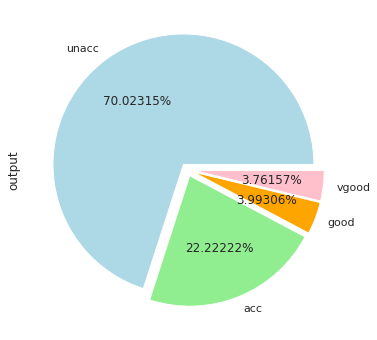

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'], 
                                explode=(0.05, 0.05, 0.05,0.05), ax=ax)
plt.show()

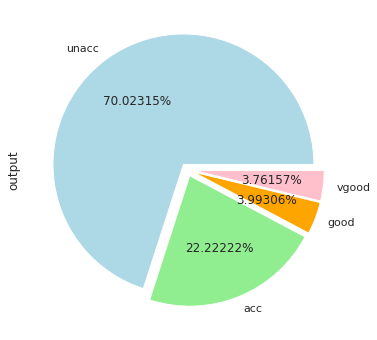

In [15]:
import pandas as pd 
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
sns.set(style='darkgrid') 

cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/산대특/deeplearning/ch02/car_evaluation.csv", names = cols, header = None)
cars.head()

fig, ax = plt.subplots(figsize=(8, 6))
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                                colors=['lightblue', 'lightgreen', 'orange', 'pink'], 
                                explode=(0.05, 0.05, 0.05,0.05), ax=ax)
plt.show()

- 원핫 인코딩 적용

In [16]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)
y = labels.values

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   price_high          1728 non-null   uint8
 1   price_low           1728 non-null   uint8
 2   price_med           1728 non-null   uint8
 3   price_vhigh         1728 non-null   uint8
 4   maint_high          1728 non-null   uint8
 5   maint_low           1728 non-null   uint8
 6   maint_med           1728 non-null   uint8
 7   maint_vhigh         1728 non-null   uint8
 8   doors_2             1728 non-null   uint8
 9   doors_3             1728 non-null   uint8
 10  doors_4             1728 non-null   uint8
 11  doors_5more         1728 non-null   uint8
 12  persons_2           1728 non-null   uint8
 13  persons_4           1728 non-null   uint8
 14  persons_more        1728 non-null   uint8
 15  lug_capacity_big    1728 non-null   uint8
 16  lug_capacity_med    1728 non-null   uint8


- 훈련과 테스트 데이터셋으로 분리
- p.55 차상태! - 4가지 값

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 21), (346, 21), (1382, 4), (346, 4))

## 모델 생성 및 컴파일

In [22]:
X.shape[1]

21

In [23]:
y.shape[1]

4

In [32]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout 
from tensorflow.keras.models import Model 

# 입력 레이어
input_layer = Input(shape = X.shape[1], )

# 히든 레이어 2개만 쌓자
dense_layer_1 = Dense(18, activation='relu')(input_layer)
dense_layer_2 = Dense(15, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(12, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(8, activation='relu')(dense_layer_3)

# 출력 레이어
output = Dense(y.shape[1], activation='softmax')(dense_layer_4)

# 모델 컴파일
model = Model(inputs=input_layer, outputs = output)
model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_9 (Dense)             (None, 18)                396       
                                                                 
 dense_10 (Dense)            (None, 15)                285       
                                                                 
 dense_11 (Dense)            (None, 12)                192       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainable p

In [33]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size = 8, # 데이터의 묶음
                    epochs = 4, # 학습의 횟수
                    verbose=1, # 학습 내용 출력
                    validation_split = 0.2)

Epoch 1/4
139/139 [==============================] - 1s 5ms/step - loss: 0.8566 - acc: 0.7195 - val_loss: 0.8053 - val_acc: 0.6498
Epoch 2/4
139/139 [==============================] - 1s 4ms/step - loss: 0.5798 - acc: 0.7240 - val_loss: 0.5856 - val_acc: 0.6679
Epoch 3/4
139/139 [==============================] - 0s 3ms/step - loss: 0.3539 - acc: 0.8389 - val_loss: 0.3453 - val_acc: 0.8592
Epoch 4/4
139/139 [==============================] - 1s 4ms/step - loss: 0.2469 - acc: 0.8869 - val_loss: 0.2918 - val_acc: 0.8664


In [34]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 3ms/step - loss: 0.2209 - acc: 0.9162
Test Score: 0.22085455060005188
Test Accuracy: 0.9161849617958069
